In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen_train = ImageDataGenerator(rescale = 1/255, shear_range = 0.2, zoom_range = 0.2, 
                               brightness_range = (0.1, 0.5), horizontal_flip=True)

train_data = gen_train.flow_from_directory("recycling waste",
                                           target_size = (224, 224), batch_size = 32, class_mode="categorical")

Found 8369 images belonging to 9 classes.


In [4]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg16 = VGG16(input_shape = (224, 224, 3), weights = "imagenet", include_top = False)

58889256/58889256 [==============================] - 14s 0us/step


In [5]:
for layer in vgg16.layers:
  layer.trainable = False

In [7]:
from tensorflow.keras import layers
x = layers.Flatten()(vgg16.output)

In [8]:
prediction = layers.Dense(units = 9, activation="softmax")(x)
model = tf.keras.models.Model(inputs = vgg16.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy"])
result = model.fit_generator(train_data, epochs = 28, steps_per_epoch=len(train_data))

C:\Users\abhin\AppData\Local\Temp/ipykernel_13472/1933143045.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  result = model.fit_generator(train_data, epochs = 28, steps_per_epoch=len(train_data))


Epoch 1/28
262/262 [==============================] - 738s 3s/step - loss: 1.9392 - accuracy: 0.3386
Epoch 2/28
262/262 [==============================] - 769s 3s/step - loss: 1.6231 - accuracy: 0.4420
Epoch 3/28
262/262 [==============================] - 849s 3s/step - loss: 1.4927 - accuracy: 0.4891
Epoch 4/28
262/262 [==============================] - 812s 3s/step - loss: 1.4034 - accuracy: 0.5173
Epoch 5/28
262/262 [==============================] - 837s 3s/step - loss: 1.3830 - accuracy: 0.5277
Epoch 6/28
262/262 [==============================] - 766s 3s/step - loss: 1.2862 - accuracy: 0.5565
Epoch 7/28
262/262 [==============================] - 786s 3s/step - loss: 1.2662 - accuracy: 0.5661
Epoch 8/28
262/262 [==============================] - 795s 3s/step - loss: 1.2337 - accuracy: 0.5813
Epoch 9/28
262/262 [==============================] - 782s 3s/step - loss: 1.1529 - accuracy: 0.6076
Epoch 10/28
262/262 [==============================] - 798s 3s/step - loss: 1.1727 - accura

In [13]:
from tensorflow.keras.preprocessing import image
output_class = ["batteries", "clothes", "e-waste", "glass", "light blubs", "metal", "organic", "paper", "plastic"]
def waste_prediction(new_image):
  test_image = image.load_img(new_image, target_size = (224,224))
  plt.axis("off")
  plt.imshow(test_image)
  plt.show()
 
  test_image = image.img_to_array(test_image) / 255
  test_image = np.expand_dims(test_image, axis=0)

  predicted_array = model.predict(test_image)
  predicted_value = output_class[np.argmax(predicted_array)]
  predicted_accuracy = round(np.max(predicted_array) * 100, 2)

  print("The waste contains : ", predicted_value, " with ", predicted_accuracy, " % accuracy pls seperate it from waste")

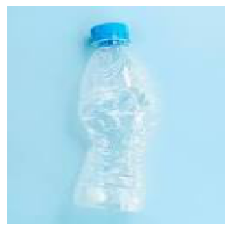

1/1 [==============================] - 0s 81ms/step
The waste contains :  plastic  with  85.42  % accuracy pls seperate it from waste


In [14]:
waste_prediction("1.jpeg")

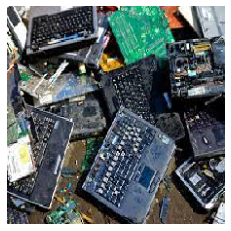

1/1 [==============================] - 0s 82ms/step
The waste contains :  e-waste  with  99.96  % accuracy pls seperate it from waste


In [15]:
waste_prediction("2.jpeg")

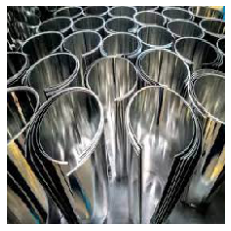

1/1 [==============================] - 0s 82ms/step
The waste contains :  metal  with  96.5  % accuracy pls seperate it from waste


In [16]:
waste_prediction("3.jpeg")

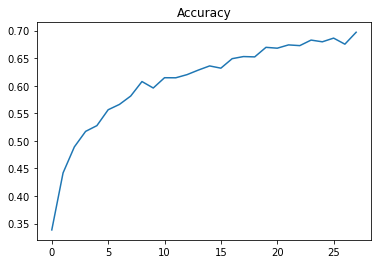

In [17]:
plt.title("Accuracy")
plt.plot(result.history["accuracy"])
plt.show()

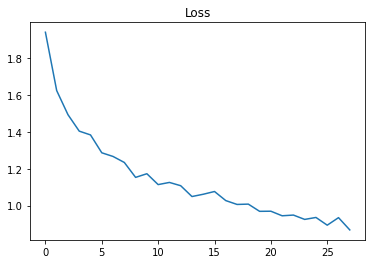

In [18]:
plt.title("Loss")
plt.plot(result.history["loss"])
plt.show()

In [19]:
model.save("classifyWaste.h5")